## Global Cost of Living & CPI Data Preprocessing

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px; /* title font size */
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px; /* content font size */
}
</style>

### **Introduction**
This notebook is divided into 2 sections. The first section will explore a dataset that details the cost of living in almost 5,000 cities across the world. Exploratory data analysis will be conducted to determine which 2 continents have the highest and lowest cost of living, respectively. We will also consider the cost of living in North America. The second section will take a CPI dataset and preprocess it, which will then be used in the following 3 notebooks.

---
<h3 class="custom-heading"><b>Contributor(s)</b></h3>
<ul class="custom-spacing">
  <li>Code Originator(s): Ananya Nimbalkar</li>
  <li>Code Reviewer(s): Ananya Nimbalkar, Xiaohan Kuang, Hexuan Fan, Ziji Tang</li>
  <li>Code Reviser(s): Ananya Nimbalkar, Xiaohan Kuang, </li>
</ul>


---
### **Global Cost of Living**

#### Data Details
This dataset was downloaded from Kaggle (Link: https://www.kaggle.com/datasets/mvieira101/global-cost-of-living?select=cost-of-living.csv).

It contains information about the cost of living in about 5000 cities across the world. Each row is a different city, and each column details the cost of certain goods like food, transportation, housing, etc. All prices are in USD.

---
### **Code**

First, we need to import all necessary libraries.

  <li>The <code>LOCAL_PATH</code> variable is set to point to the data folder in the current working directory. </li> 
  <li>The <code>CLEANED_PATH</code> variable is set to point to the cleaned data folder in the current working directory. </li>
  <li>The <code>RAW_PATH</code> variable is set to point to the raw data folder in the current working directory. </li>
  <li>The <code>PLOT_PATH</code> variable is set to point to the plots folder in the current working directory. </li>

In [1]:
#Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np
import seaborn as sns
import os
import pycountry
import pycountry_convert as pc
import warnings
warnings.filterwarnings("ignore")

LOCAL_PATH = os.getcwd() + '/data/'
CLEANED_PATH = LOCAL_PATH + '/cleaned/'
RAW_PATH = LOCAL_PATH + '/raw/'
PLOT_PATH = os.getcwd() + '/plots/'

In [2]:
#Create dataframe with csv file and display it
gcl_filename = 'cost-of-living.csv'
df_living_cost = pd.read_csv(RAW_PATH + gcl_filename)
df_living_cost.head()

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1


Next, it is useful to check the characteristics of the data

In [3]:
#Check summary statistics of each column
df_living_cost

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,4869,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4870,4870,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4871,4871,Ixtapa Zihuatanejo,Mexico,5.19,31.13,12.97,0.99,NaN,1.82,0.62,...,103.78,415.11,259.44,518.89,415.11,NaN,NaN,NaN,NaN,0
4872,4872,Iqaluit,Canada,29.78,74.61,13.77,6.70,8.93,3.72,3.54,...,NaN,NaN,NaN,2978.11,2978.11,NaN,NaN,NaN,6.53,0


In [4]:
#Check shape of dataframe
df_living_cost.shape

(4874, 59)

---
### **Preprocesing**

This dataset does not have the actual column titles in the dataset. The author listed it out separately on Kaggle and instead put a 'x' followed by a number (i.e. x1, x2, etc.) to distinguish the columns. So, the column headers need to be changed to its respective titles to make the data more meaningful and easier to comprehend.

In [5]:
#Rename columns using provided description on Kaggle
column_mapping = {
    'city': 'City',
    'country': 'Country',
    'x1': 'Meal, Inexpensive Restaurant (USD)',
    'x2': 'Meal for 2 People, Mid-range Restaurant, Three-course (USD)',
    'x3': 'McMeal at McDonalds (or Equivalent Combo Meal) (USD)',
    'x4': 'Domestic Beer (0.5 liter draught, in restaurants) (USD)',
    'x5': 'Imported Beer (0.33 liter bottle, in restaurants) (USD)',
    'x6': 'Cappuccino (regular, in restaurants) (USD)',
    'x7': 'Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)',
    'x8': 'Water (0.33 liter bottle, in restaurants) (USD)',
    'x9': 'Milk (regular), (1 liter) (USD)',
    'x10': 'Loaf of Fresh White Bread (500g) (USD)',
    'x11': 'Rice (white), (1kg) (USD)',
    'x12': 'Eggs (regular) (12) (USD)',
    'x13': 'Local Cheese (1kg) (USD)',
    'x14': 'Chicken Fillets (1kg) (USD)',
    'x15': 'Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)',
    'x16': 'Apples (1kg) (USD)',
    'x17': 'Banana (1kg) (USD)',
    'x18': 'Oranges (1kg) (USD)',
    'x19': 'Tomato (1kg) (USD)',
    'x20': 'Potato (1kg) (USD)',
    'x21': 'Onion (1kg) (USD)',
    'x22': 'Lettuce (1 head) (USD)',
    'x23': 'Water (1.5 liter bottle, at the market) (USD)',
    'x24': 'Bottle of Wine (Mid-Range, at the market) (USD)',
    'x25': 'Domestic Beer (0.5 liter bottle, at the market) (USD)',
    'x26': 'Imported Beer (0.33 liter bottle, at the market) (USD)',
    'x27': 'Cigarettes 20 Pack (Marlboro) (USD)',
    'x28': 'One-way Ticket (Local Transport) (USD)',
    'x29': 'Monthly Pass (Regular Price) (USD)',
    'x30': 'Taxi Start (Normal Tariff) (USD)',
    'x31': 'Taxi 1km (Normal Tariff) (USD)',
    'x32': 'Taxi 1hour Waiting (Normal Tariff) (USD)',
    'x33': 'Gasoline (1 liter) (USD)',
    'x34': 'Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)',
    'x35': 'Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)',
    'x36': 'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)',
    'x37': '1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)',
    'x38': 'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)',
    'x39': 'Fitness Club, Monthly Fee for 1 Adult (USD)',
    'x40': 'Tennis Court Rent (1 Hour on Weekend) (USD)',
    'x41': 'Cinema, International Release, 1 Seat (USD)',
    'x42': 'Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)',
    'x43': 'International Primary School, Yearly for 1 Child (USD)',
    'x44': '1 Pair of Jeans (Levis 501 Or Similar) (USD)',
    'x45': '1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)',
    'x46': '1 Pair of Nike Running Shoes (Mid-Range) (USD)',
    'x47': '1 Pair of Men Leather Business Shoes (USD)',
    'x48': 'Apartment (1 bedroom) in City Centre (USD)',
    'x49': 'Apartment (1 bedroom) Outside of Centre (USD)',
    'x50': 'Apartment (3 bedrooms) in City Centre (USD)',
    'x51': 'Apartment (3 bedrooms) Outside of Centre (USD)',
    'x52': 'Price per Square Meter to Buy Apartment in City Centre (USD)',
    'x53': 'Price per Square Meter to Buy Apartment Outside of Centre (USD)',
    'x54': 'Average Monthly Net Salary (After Tax) (USD)',
    'x55': 'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',
    'data_quality': 'data_quality'
}

#Apply renaming
df_cost_living = df_living_cost.rename(columns=column_mapping)

#Display renamed dataframe
df_cost_living

,Unnamed: 0,City,Country,"Meal, Inexpensive Restaurant (USD)","Meal for 2 People, Mid-range Restaurant, Three-course (USD)",McMeal at McDonalds (or Equivalent Combo Meal) (USD),"Domestic Beer (0.5 liter draught, in restaurants) (USD)","Imported Beer (0.33 liter bottle, in restaurants) (USD)","Cappuccino (regular, in restaurants) (USD)","Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)",...,1 Pair of Men Leather Business Shoes (USD),Apartment (1 bedroom) in City Centre (USD),Apartment (1 bedroom) Outside of Centre (USD),Apartment (3 bedrooms) in City Centre (USD),Apartment (3 bedrooms) Outside of Centre (USD),Price per Square Meter to Buy Apartment in City Centre (USD),Price per Square Meter to Buy Apartment Outside of Centre (USD),Average Monthly Net Salary (After Tax) (USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",data_quality
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,4869,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4870,4870,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4871,4871,Ixtapa Zihuatanejo,Mexico,5.19,31.13,12.97,0.99,NaN,1.82,0.62,...,103.78,415.11,259.44,518.89,415.11,NaN,NaN,NaN,NaN,0
4872,4872,Iqaluit,Canada,29.78,74.61,13.77,6.70,8.93,3.72,3.54,...,NaN,NaN,NaN,2978.11,2978.11,NaN,NaN,NaN,6.53,0


---
### **Identifying & Handling Missingness**

By observing the data, there seems to be missing values denoted as 'NaN'. Those values need to be identified and then it can be determined how to handle them.

In [6]:
#Check for missing values for each column
df_cost_living.isna().sum()

Unnamed: 0                                                                           0
City                                                                                 0
Country                                                                              0
Meal, Inexpensive Restaurant (USD)                                                 425
Meal for 2 People, Mid-range Restaurant, Three-course (USD)                        442
McMeal at McDonalds (or Equivalent Combo Meal) (USD)                               322
Domestic Beer (0.5 liter draught, in restaurants) (USD)                            489
Imported Beer (0.33 liter bottle, in restaurants) (USD)                            429
Cappuccino (regular, in restaurants) (USD)                                         334
Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)                               436
Water (0.33 liter bottle, in restaurants) (USD)                                    303
Milk (regular), (1 liter) (USD)            

Since there are a lot of missing values for almost every column, these values can be dropped to simplify the dataset. Imputation does not make sense here as each row is a different city, so values may differ.

In [7]:
#Drop all missing values
df_cost_living = df_cost_living.dropna()
df_cost_living

,Unnamed: 0,City,Country,"Meal, Inexpensive Restaurant (USD)","Meal for 2 People, Mid-range Restaurant, Three-course (USD)",McMeal at McDonalds (or Equivalent Combo Meal) (USD),"Domestic Beer (0.5 liter draught, in restaurants) (USD)","Imported Beer (0.33 liter bottle, in restaurants) (USD)","Cappuccino (regular, in restaurants) (USD)","Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)",...,1 Pair of Men Leather Business Shoes (USD),Apartment (1 bedroom) in City Centre (USD),Apartment (1 bedroom) Outside of Centre (USD),Apartment (3 bedrooms) in City Centre (USD),Apartment (3 bedrooms) Outside of Centre (USD),Price per Square Meter to Buy Apartment in City Centre (USD),Price per Square Meter to Buy Apartment Outside of Centre (USD),Average Monthly Net Salary (After Tax) (USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",data_quality
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,4727,Erlenbach am Main,Germany,15.58,51.93,8.31,4.15,4.15,3.40,2.54,...,119.45,804.99,640.53,2129.33,1256.82,7042.36,4050.92,2445.27,2.35,0
4732,4732,Gig Harbor,United States,12.00,40.00,10.50,7.00,6.00,5.15,2.48,...,101.67,1800.00,2000.00,3000.00,2400.00,3821.19,2852.44,4500.00,5.22,0
4846,4846,Murovani Kurylivtsi,Ukraine,2.71,12.17,2.68,0.67,1.08,0.68,0.24,...,60.87,108.21,94.68,162.31,121.74,236.71,229.94,363.85,13.05,0
4863,4863,Tirupati,India,2.45,9.18,4.28,2.11,3.06,2.01,0.46,...,37.13,82.64,61.21,183.64,128.55,658.89,395.34,612.13,7.97,0


The columns 'Unamed: 0' and 'data_quality' are not relevant to the cost of living in different cities, so these can be dropped as well

In [8]:
#Drop irrelevant columns
df_cost_living.drop(columns=["Unnamed: 0", "data_quality"], inplace=True)
df_cost_living

,City,Country,"Meal, Inexpensive Restaurant (USD)","Meal for 2 People, Mid-range Restaurant, Three-course (USD)",McMeal at McDonalds (or Equivalent Combo Meal) (USD),"Domestic Beer (0.5 liter draught, in restaurants) (USD)","Imported Beer (0.33 liter bottle, in restaurants) (USD)","Cappuccino (regular, in restaurants) (USD)","Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)","Water (0.33 liter bottle, in restaurants) (USD)",...,1 Pair of Nike Running Shoes (Mid-Range) (USD),1 Pair of Men Leather Business Shoes (USD),Apartment (1 bedroom) in City Centre (USD),Apartment (1 bedroom) Outside of Centre (USD),Apartment (3 bedrooms) in City Centre (USD),Apartment (3 bedrooms) Outside of Centre (USD),Price per Square Meter to Buy Apartment in City Centre (USD),Price per Square Meter to Buy Apartment Outside of Centre (USD),Average Monthly Net Salary (After Tax) (USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"
0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,0.19,...,49.35,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96
1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,0.32,...,86.55,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01
2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,0.27,...,72.89,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15
3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,0.51,...,69.47,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80
4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,0.78,...,70.21,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,Erlenbach am Main,Germany,15.58,51.93,8.31,4.15,4.15,3.40,2.54,2.35,...,97.93,119.45,804.99,640.53,2129.33,1256.82,7042.36,4050.92,2445.27,2.35
4732,Gig Harbor,United States,12.00,40.00,10.50,7.00,6.00,5.15,2.48,1.92,...,87.17,101.67,1800.00,2000.00,3000.00,2400.00,3821.19,2852.44,4500.00,5.22
4846,Murovani Kurylivtsi,Ukraine,2.71,12.17,2.68,0.67,1.08,0.68,0.24,0.13,...,59.24,60.87,108.21,94.68,162.31,121.74,236.71,229.94,363.85,13.05
4863,Tirupati,India,2.45,9.18,4.28,2.11,3.06,2.01,0.46,0.13,...,38.77,37.13,82.64,61.21,183.64,128.55,658.89,395.34,612.13,7.97


We can save this dataframe into a .csv file which we can then use to generate a dataprep report.

In [9]:
df_cost_living.to_csv(CLEANED_PATH + 'df_cost_living.csv')

---
### **Dataprep report**

To gain a brief initial understanding of the cleaned dataset, we can use DataPrep: an intelligent data service for visually exploring, cleaning, and preparing data for our analysis. The report is generated as an external html file called `Dataprep_report.html` in the `data` folder.

Dataprep is not compatible for windows without using Google Colab, so here is the code that was run to generate the report:


#### **Code**

!pip install dataprep

from dataprep.datasets import load_dataset

from dataprep.eda import create_report

import pandas as pd

df = pd.read_csv(CLEANED_PATH + 'df_cost_living.csv')

report = create_report(df)

report.save(LOCAL_PATH + 'Cost_of_Living_Report')

report.show_browser()

As seen from the DataPrep report, there are no missing or duplicate values, which means the preprocessing was done correctly. Looking at the 'Country' variable, the United States has the greatest count of values after the 'Others' category. The United States makes up for 10.36% of the data. Focusing on variables that entail food and beverages, produce in particular, they average to a cost between 1 USD to 5 USD irrespective of the city and country. We can note that there is a similar cost set for these items across the world, and there are no drastic differences. There are some variables in the dataset where several rows have a value of 0, like Tennis Court Rent (1 Hour on Weekend) (USD) and Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD), but they make up for less than 1% of the data, so we can disregard that.

---

Now, the characteristics of the cleaned dataset can be observed.

In [67]:
#Check summary statistics of each column
df_cost_living.describe()

,"Meal, Inexpensive Restaurant (USD)","Meal for 2 People, Mid-range Restaurant, Three-course (USD)",McMeal at McDonalds (or Equivalent Combo Meal) (USD),"Domestic Beer (0.5 liter draught, in restaurants) (USD)","Imported Beer (0.33 liter bottle, in restaurants) (USD)","Cappuccino (regular, in restaurants) (USD)","Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)","Water (0.33 liter bottle, in restaurants) (USD)","Milk (regular), (1 liter) (USD)",Loaf of Fresh White Bread (500g) (USD),...,1 Pair of Nike Running Shoes (Mid-Range) (USD),1 Pair of Men Leather Business Shoes (USD),Apartment (1 bedroom) in City Centre (USD),Apartment (1 bedroom) Outside of Centre (USD),Apartment (3 bedrooms) in City Centre (USD),Apartment (3 bedrooms) Outside of Centre (USD),Price per Square Meter to Buy Apartment in City Centre (USD),Price per Square Meter to Buy Apartment Outside of Centre (USD),Average Monthly Net Salary (After Tax) (USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"
count,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,...,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000
mean,9.781661,43.969059,6.808790,3.360403,3.829130,2.639106,1.512888,1.088829,1.164660,1.512389,...,78.688133,87.609604,701.805965,539.487737,1283.944660,950.913441,3518.501756,2444.231883,1718.236748,6.556329
std,6.121909,24.874197,2.602532,2.107239,1.972221,1.223663,0.898460,0.754642,0.494362,0.951209,...,35.528916,36.853713,675.091494,529.733907,1247.426585,928.326570,7393.844984,3296.287914,1525.715944,5.578942
min,0.670000,5.620000,2.010000,0.440000,0.500000,0.390000,0.180000,0.080000,0.390000,0.080000,...,15.970000,14.830000,43.810000,22.280000,67.630000,51.980000,109.530000,90.120000,35.750000,0.800000
25%,4.367500,23.842500,4.890000,1.590000,2.240000,1.587500,0.740000,0.450000,0.850000,0.790000,...,64.225000,62.852500,280.630000,191.037500,519.770000,367.405000,1262.367500,873.945000,497.347500,2.745000
50%,8.990000,40.000000,6.550000,2.665000,3.500000,2.515000,1.385000,0.970000,1.070000,1.260000,...,76.350000,86.610000,514.475000,389.510000,944.270000,694.765000,2366.620000,1689.865000,1114.005000,5.110000
75%,15.000000,62.320000,8.500000,5.000000,5.050000,3.460000,2.180000,1.580000,1.310000,2.020000,...,88.752500,109.590000,929.962500,726.792500,1693.267500,1299.235000,4266.430000,2963.145000,2672.315000,8.930000
max,31.700000,150.000000,18.350000,12.360000,14.250000,7.670000,5.630000,4.490000,6.810000,6.850000,...,923.120000,542.740000,12608.830000,8989.370000,24960.290000,17868.180000,237522.540000,79174.180000,7910.520000,56.250000


In [68]:
#Check shape of dataframe
df_cost_living.shape

(1264, 57)

In [69]:
#List of all column names
df_cost_living.columns

Index(['City', 'Country', 'Meal, Inexpensive Restaurant (USD)',
       'Meal for 2 People, Mid-range Restaurant, Three-course (USD)',
       'McMeal at McDonalds (or Equivalent Combo Meal) (USD)',
       'Domestic Beer (0.5 liter draught, in restaurants) (USD)',
       'Imported Beer (0.33 liter bottle, in restaurants) (USD)',
       'Cappuccino (regular, in restaurants) (USD)',
       'Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)',
       'Water (0.33 liter bottle, in restaurants) (USD)',
       'Milk (regular), (1 liter) (USD)',
       'Loaf of Fresh White Bread (500g) (USD)', 'Rice (white), (1kg) (USD)',
       'Eggs (regular) (12) (USD)', 'Local Cheese (1kg) (USD)',
       'Chicken Fillets (1kg) (USD)',
       'Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)',
       'Apples (1kg) (USD)', 'Banana (1kg) (USD)', 'Oranges (1kg) (USD)',
       'Tomato (1kg) (USD)', 'Potato (1kg) (USD)', 'Onion (1kg) (USD)',
       'Lettuce (1 head) (USD)',
       'Water (1.5 liter bott

In [70]:
#Country names in dataset
df_cost_living['Country'].unique()

array(['India', 'China', 'Indonesia', 'Philippines', 'South Korea',
       'Thailand', 'Japan', 'Nigeria', 'Pakistan', 'Bangladesh', 'Brazil',
       'Russia', 'Mexico', 'Egypt', 'United States', 'Turkey',
       'Argentina', 'Iran', 'France', 'United Kingdom', 'Vietnam', 'Peru',
       'Angola', 'Malaysia', 'Colombia', 'Tanzania', 'Chile', 'Hong Kong',
       'Saudi Arabia', 'Iraq', 'Spain', 'Sudan', 'Kenya', 'Canada',
       'Singapore', 'Australia', 'South Africa', 'Morocco', 'Jordan',
       'Germany', 'Algeria', 'Ethiopia', 'Kuwait', 'Ukraine', 'Guatemala',
       'Italy', 'Taiwan', 'Bolivia', 'Ecuador', 'Madagascar',
       'United Arab Emirates', 'Dominican Republic', 'Uzbekistan',
       'Cameroon', 'Ghana', 'Azerbaijan', 'Zimbabwe', 'Cuba', 'Cambodia',
       'Belarus', 'Venezuela', 'Kazakhstan', 'Austria', 'Romania',
       'Syria', 'Poland', 'Belgium', 'Hungary', 'Uganda', 'Oman',
       'Mongolia', 'New Zealand', 'Serbia', 'Uruguay', 'Bulgaria',
       'Mozambique', 'Qatar'

---
### **Visualization:**
#### This section will focus on developing a few visualizations to help determine the continents with the greatest and least cost of living.


### **Map**

This is a map that shows the average monthly net salary in USD after taxes by country. The axes represent the geographical coordinates, where the y-axis shows the latitude and the x-axis shows the longitude. The color gradient map represents the average monthly net salary with countries colored based on the salary amount. So, the darker the green, the higher the average monthly net salary. Note not all countries had data so they are not shaded. Countries Switzerland, Australia, United States of America, and Canada have the greatest average monthly net salary. In terms of continents, North America and Europe has a high average monthly net salary, whereas Asia's is very low.

---

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>

<h3 class="custom-heading"><b>Contributor(s)</b></h3>
<ul class="custom-spacing">
  <li>Code Reviser(s): Xiaohan Kuang </li>
</ul>

---

<h3 class="custom-heading"><b>Edit Information</b></h3>
<ul class="custom-spacing">
  <li> Removed text label of country names which make the map look messy</li>
  <li> Adjusted the map legend and size for a consistent and uniform appearance.</li>
</ul>

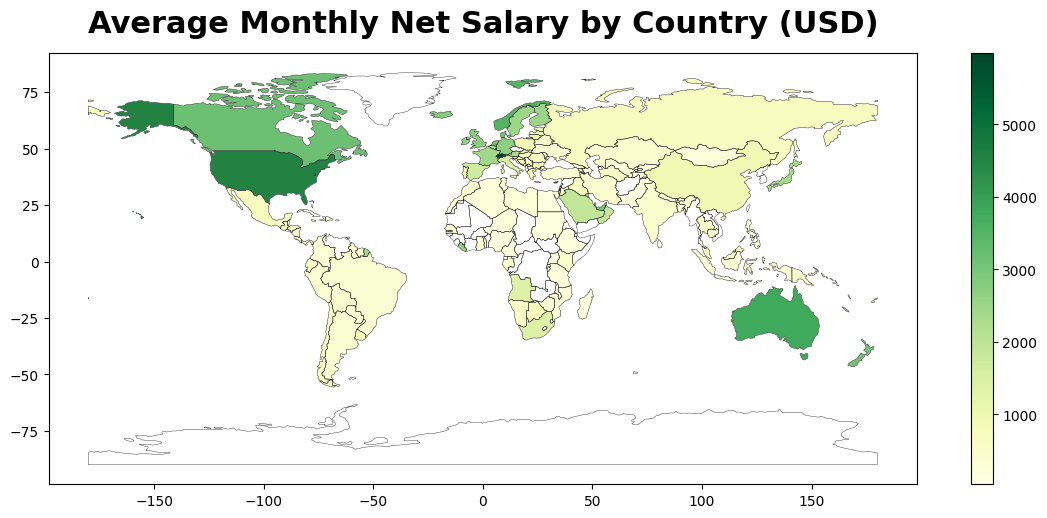

In [71]:
#Load world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Rename countries in dataset to match with geopandas naming convention
df_cost_living['Country'] = df_cost_living['Country'].replace({
    'United States': 'United States of America',
    'South Korea': 'Korea',
    'Dominican Republic': 'Dominican Rep.',
    'Bosnia And Herzegovina': 'Bosnia and Herz.',
    'Trinidad And Tobago': 'Trinidad and Tobago',
    'Ivory Coast': 'Côte d\'Ivoire',
    'Laos': "Lao PDR",
    'Macedonia': "North Macedonia",
    'Myanmar': "Myanmar (Burma)",
    'Palestine': "Palestinian Territories",
    'Republic of the Congo': "Congo",
    'Syria': "Syrian Arab Republic",
    'Taiwan': "Taiwan (China)",
    'Venezuela': "Venezuela (Bolivarian Republic)",
    'Vietnam': "Viet Nam",
    'Mauritus': 'Mauritius',
    'C.A.R': 'Central African Rep.',
    'South Sudan': 'South Sudan',
    'Dem Rep. of Congo': 'Dem. Rep. Congo'
})

#Compute average monthly net salary by country
avg_salary_by_country = df_cost_living.groupby('Country')['Average Monthly Net Salary (After Tax) (USD)'].mean()

#Join world map dataset with average salary data
merged = world.set_index('name').join(avg_salary_by_country)

#Plot base layer with all countries in a neutral color
fig, ax = plt.subplots(figsize=(14, 10))
world.boundary.plot(ax=ax, linewidth=0.25, edgecolor='black')
world.plot(ax=ax, color='white')

#Overlay countries from dataset with color gradient for average monthly net salary
merged.dropna().plot(column='Average Monthly Net Salary (After Tax) (USD)',
                            cmap='YlGn',
                            linewidth=0.25,
                            ax=ax,
                            edgecolor='0.8',
                            legend=True)

#Add title and axes labels
ax.set_title("Average Monthly Net Salary by Country (USD)", fontweight="bold", fontsize=22, pad=15)
# ax.set_xlabel("Longitude", fontsize=15)
# ax.set_ylabel("Latitude", fontsize=15)


#Define threshold for salary below which countries won't be labeled
# Avoids overlapping of country names on map
salary_threshold = df_cost_living['Average Monthly Net Salary (After Tax) (USD)'].quantile(0.75)

#Adjust colorbar size so it lines up with map
#Get current main axis (where the map is plotted)
ax = plt.gca()
#Get axis of colorbar
cax = plt.gcf().get_axes()[-1]

#Get position of main axis
main_ax_pos = ax.get_position()

#Adjust position of colorbar
cax.set_position([cax.get_position().x0, main_ax_pos.y0, cax.get_position().width, main_ax_pos.height])

#Save figure to be used in presentation
plt.savefig(PLOT_PATH + "average_salary_by_country.png", dpi=300, bbox_inches='tight')
plt.show()

---
The columns in the dataset can be grouped into 4 categories: Food and Drinks, Transportation and Housing, Basic Necessities, and Memberships. Then, the mean for each of these 4 categories can be found.

In [72]:
#Group columns into 4 categories
food_and_drinks = [
    'Meal, Inexpensive Restaurant (USD)', 'Meal for 2 People, Mid-range Restaurant, Three-course (USD)',
    'McMeal at McDonalds (or Equivalent Combo Meal) (USD)', 'Domestic Beer (0.5 liter draught, in restaurants) (USD)',
    'Imported Beer (0.33 liter bottle, in restaurants) (USD)', 'Cappuccino (regular, in restaurants) (USD)',
    'Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)', 'Water (0.33 liter bottle, in restaurants) (USD)',
    'Milk (regular), (1 liter) (USD)', 'Loaf of Fresh White Bread (500g) (USD)', 'Rice (white), (1kg) (USD)',
    'Eggs (regular) (12) (USD)', 'Local Cheese (1kg) (USD)', 'Chicken Fillets (1kg) (USD)',
    'Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)', 'Apples (1kg) (USD)', 'Banana (1kg) (USD)',
    'Oranges (1kg) (USD)', 'Tomato (1kg) (USD)', 'Potato (1kg) (USD)', 'Onion (1kg) (USD)', 'Lettuce (1 head) (USD)',
    'Water (1.5 liter bottle, at the market) (USD)', 'Bottle of Wine (Mid-Range, at the market) (USD)',
    'Domestic Beer (0.5 liter bottle, at the market) (USD)', 'Imported Beer (0.33 liter bottle, at the market) (USD)',
    'Cigarettes 20 Pack (Marlboro) (USD)'
]

transportation_and_housing = [
    'One-way Ticket (Local Transport) (USD)', 'Monthly Pass (Regular Price) (USD)', 'Taxi Start (Normal Tariff) (USD)',
    'Taxi 1km (Normal Tariff) (USD)', 'Taxi 1hour Waiting (Normal Tariff) (USD)', 'Gasoline (1 liter) (USD)',
    'Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)',
    'Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)', 'Apartment (1 bedroom) in City Centre (USD)',
    'Apartment (1 bedroom) Outside of Centre (USD)', 'Apartment (3 bedrooms) in City Centre (USD)',
    'Apartment (3 bedrooms) Outside of Centre (USD)', 'Price per Square Meter to Buy Apartment in City Centre (USD)',
    'Price per Square Meter to Buy Apartment Outside of Centre (USD)'
]

basic_necessities = [
    'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)',
    '1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)', 'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)',
    '1 Pair of Jeans (Levis 501 Or Similar) (USD)', '1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)',
    '1 Pair of Nike Running Shoes (Mid-Range) (USD)', '1 Pair of Men Leather Business Shoes (USD)'
]

memberships = [
    'Fitness Club, Monthly Fee for 1 Adult (USD)', 'Tennis Court Rent (1 Hour on Weekend) (USD)',
    'Cinema, International Release, 1 Seat (USD)', 'Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)',
    'International Primary School, Yearly for 1 Child (USD)'
]

#Create columns for grouped categories and get mean
df_cost_living['Food and Drinks'] = df_cost_living[food_and_drinks].mean(axis=1)
df_cost_living['Transportation and Housing'] = df_cost_living[transportation_and_housing].mean(axis=1)
df_cost_living['Basic Necessities'] = df_cost_living[basic_necessities].mean(axis=1)
df_cost_living['Memberships'] = df_cost_living[memberships].mean(axis=1)

---
Next, all the countries can be mapped to its continent, and the mean cost for each category can be found by country.

**Note**: Geopandas is unable to map every country to the appropriate continent due to case sensitivity and other issues, so a manual mapping is done.

In [73]:
#Map countries to continents
continent_mapping = {
    'India': 'Asia', 'China': 'Asia', 'Indonesia': 'Asia', 'Philippines': 'Asia', 'South Korea': 'Asia',
    'Thailand': 'Asia', 'Japan': 'Asia', 'Nigeria': 'Africa', 'Pakistan': 'Asia', 'Bangladesh': 'Asia',
    'Brazil': 'South America', 'Russia': 'Europe', 'Mexico': 'North America', 'Egypt': 'Africa',
    'United States': 'North America', 'Turkey': 'Asia', 'Argentina': 'South America', 'Iran': 'Asia',
    'France': 'Europe', 'United Kingdom': 'Europe', 'Vietnam': 'Asia', 'Peru': 'South America',
    'Angola': 'Africa', 'Malaysia': 'Asia', 'Colombia': 'South America', 'Tanzania': 'Africa',
    'Chile': 'South America', 'Hong Kong': 'Asia', 'Saudi Arabia': 'Asia', 'Iraq': 'Asia',
    'Spain': 'Europe', 'Sudan': 'Africa', 'Kenya': 'Africa', 'Canada': 'North America',
    'Singapore': 'Asia', 'Australia': 'Oceania', 'South Africa': 'Africa', 'Morocco': 'Africa',
    'Jordan': 'Asia', 'Germany': 'Europe', 'Algeria': 'Africa', 'Ethiopia': 'Africa', 'Kuwait': 'Asia',
    'Ukraine': 'Europe', 'Guatemala': 'North America', 'Italy': 'Europe', 'Taiwan': 'Asia',
    'Bolivia': 'South America', 'Ecuador': 'South America', 'Madagascar': 'Africa',
    'United Arab Emirates': 'Asia', 'Dominican Republic': 'North America', 'Uzbekistan': 'Asia',
    'Cameroon': 'Africa', 'Ghana': 'Africa', 'Azerbaijan': 'Asia', 'Zimbabwe': 'Africa', 'Cuba': 'North America',
    'Cambodia': 'Asia', 'Belarus': 'Europe', 'Venezuela': 'South America', 'Kazakhstan': 'Asia',
    'Austria': 'Europe', 'Romania': 'Europe', 'Syria': 'Asia', 'Poland': 'Europe', 'Belgium': 'Europe',
    'Hungary': 'Europe', 'Uganda': 'Africa', 'Oman': 'Asia', 'Mongolia': 'Asia', 'New Zealand': 'Oceania',
    'Serbia': 'Europe', 'Uruguay': 'South America', 'Bulgaria': 'Europe', 'Mozambique': 'Africa',
    'Qatar': 'Asia', 'Senegal': 'Africa', 'Rwanda': 'Africa', 'Honduras': 'North America', 'Libya': 'Africa',
    'Georgia': 'Europe', 'Denmark': 'Europe', 'Armenia': 'Asia', 'Kyrgyzstan': 'Asia', 'Tunisia': 'Africa',
    'Nepal': 'Asia', 'Nicaragua': 'North America', 'Niger': 'Africa', 'Liberia': 'Africa', 'Israel': 'Asia',
    'Sweden': 'Europe', 'Croatia': 'Europe', 'Tajikistan': 'Asia', 'Malawi': 'Africa', 'Netherlands': 'Europe',
    'Sri Lanka': 'Asia', 'Panama': 'North America', 'Gabon': 'Africa', 'Norway': 'Europe', 'Togo': 'Africa',
    'Finland': 'Europe', 'Moldova': 'Europe', 'Latvia': 'Europe', 'Lithuania': 'Europe', 'Greece': 'Europe',
    'Slovakia': 'Europe', 'Ireland': 'Europe', 'Portugal': 'Europe', 'Lebanon': 'Asia', 'Paraguay': 'South America',
    'Estonia': 'Europe', 'Jamaica': 'North America', 'Albania': 'Europe', 'Cyprus': 'Europe', 'Namibia': 'Africa',
    'Slovenia': 'Europe', 'Papua New Guinea': 'Oceania', 'Bosnia And Herzegovina': 'Europe', 'Botswana': 'Africa',
    'Suriname': 'South America', 'Guyana': 'South America', 'Maldives': 'Asia', 'Gibraltar': 'Europe',
    'Montenegro': 'Europe', 'Switzerland': 'Europe', 'Bahrain': 'Asia', 'Iceland': 'Europe', 'Luxembourg': 'Europe',
    'Fiji': 'Oceania', 'New Caledonia': 'Oceania',
    'Bhutan': 'Asia', 'Swaziland': 'Africa', 'Brunei': 'Asia', 'Bermuda': 'North America',
    'Trinidad And Tobago': 'North America', 'Isle Of Man': 'Europe', 'Turkmenistan': 'Asia',
    'Jersey': 'Europe', 'Seychelles': 'Africa', 'Malta': 'Europe', 'Liechtenstein': 'Europe',
    'Mauritius': 'Africa', 'Costa Rica': 'North America'}


#Assigning continent to each country in dataset
df_cost_living['Continent'] = df_cost_living['Country'].map(continent_mapping)

#Aggregating by country and computing average for each of the 4 categories
df_grouped = df_cost_living.groupby('Country').agg({
    'Food and Drinks': 'mean',
    'Transportation and Housing': 'mean',
    'Basic Necessities': 'mean',
    'Memberships': 'mean',
    # Continent will remain the same for each country
    'Continent': 'first'
}).reset_index()
#Display first few rows of dataframe
df_grouped.head()

,Country,Food and Drinks,Transportation and Housing,Basic Necessities,Memberships,Continent
0,Albania,2.985556,2794.874286,44.287429,481.7212,Europe
1,Algeria,2.690833,3600.829464,43.764286,385.3030,Africa
2,Angola,6.168519,4472.311429,134.975714,741.6460,Africa
3,Argentina,2.994012,4134.047500,55.119048,602.5970,South America
4,Armenia,4.174815,4275.034286,63.745714,1618.1380,Asia


After mapping the countries to the continents and finding the average for each category, a 2x2 scatterplot can be produced.

---
### **Scatterplots**

This figure is a series of 4 scatterplots and shows the average cost by category and country. The y-axis is the average cost of these items in USD, and the x-axis shows the countries. Each subplot represents a different category: Food and drinks, transportation and housing, basic necessities, and memberships. Each point depicts a specifc country, and they are color-coded by continents as seen in the legend. The size of the point indicates the average cost, so the bigger the point, the greater the average cost for that category. The top 3 and least 3 expensive countries are labeled for each of the scatterplots, in black and indigo respectively. As shown, countries in Europe have a higher average cost, and Asia and Africa have a lesser average cost overall. Turkmenistan, Switzerland, and Bermuda are frequent expensive countries. Ghana and Sri Lanka are frequent least expensive countries.

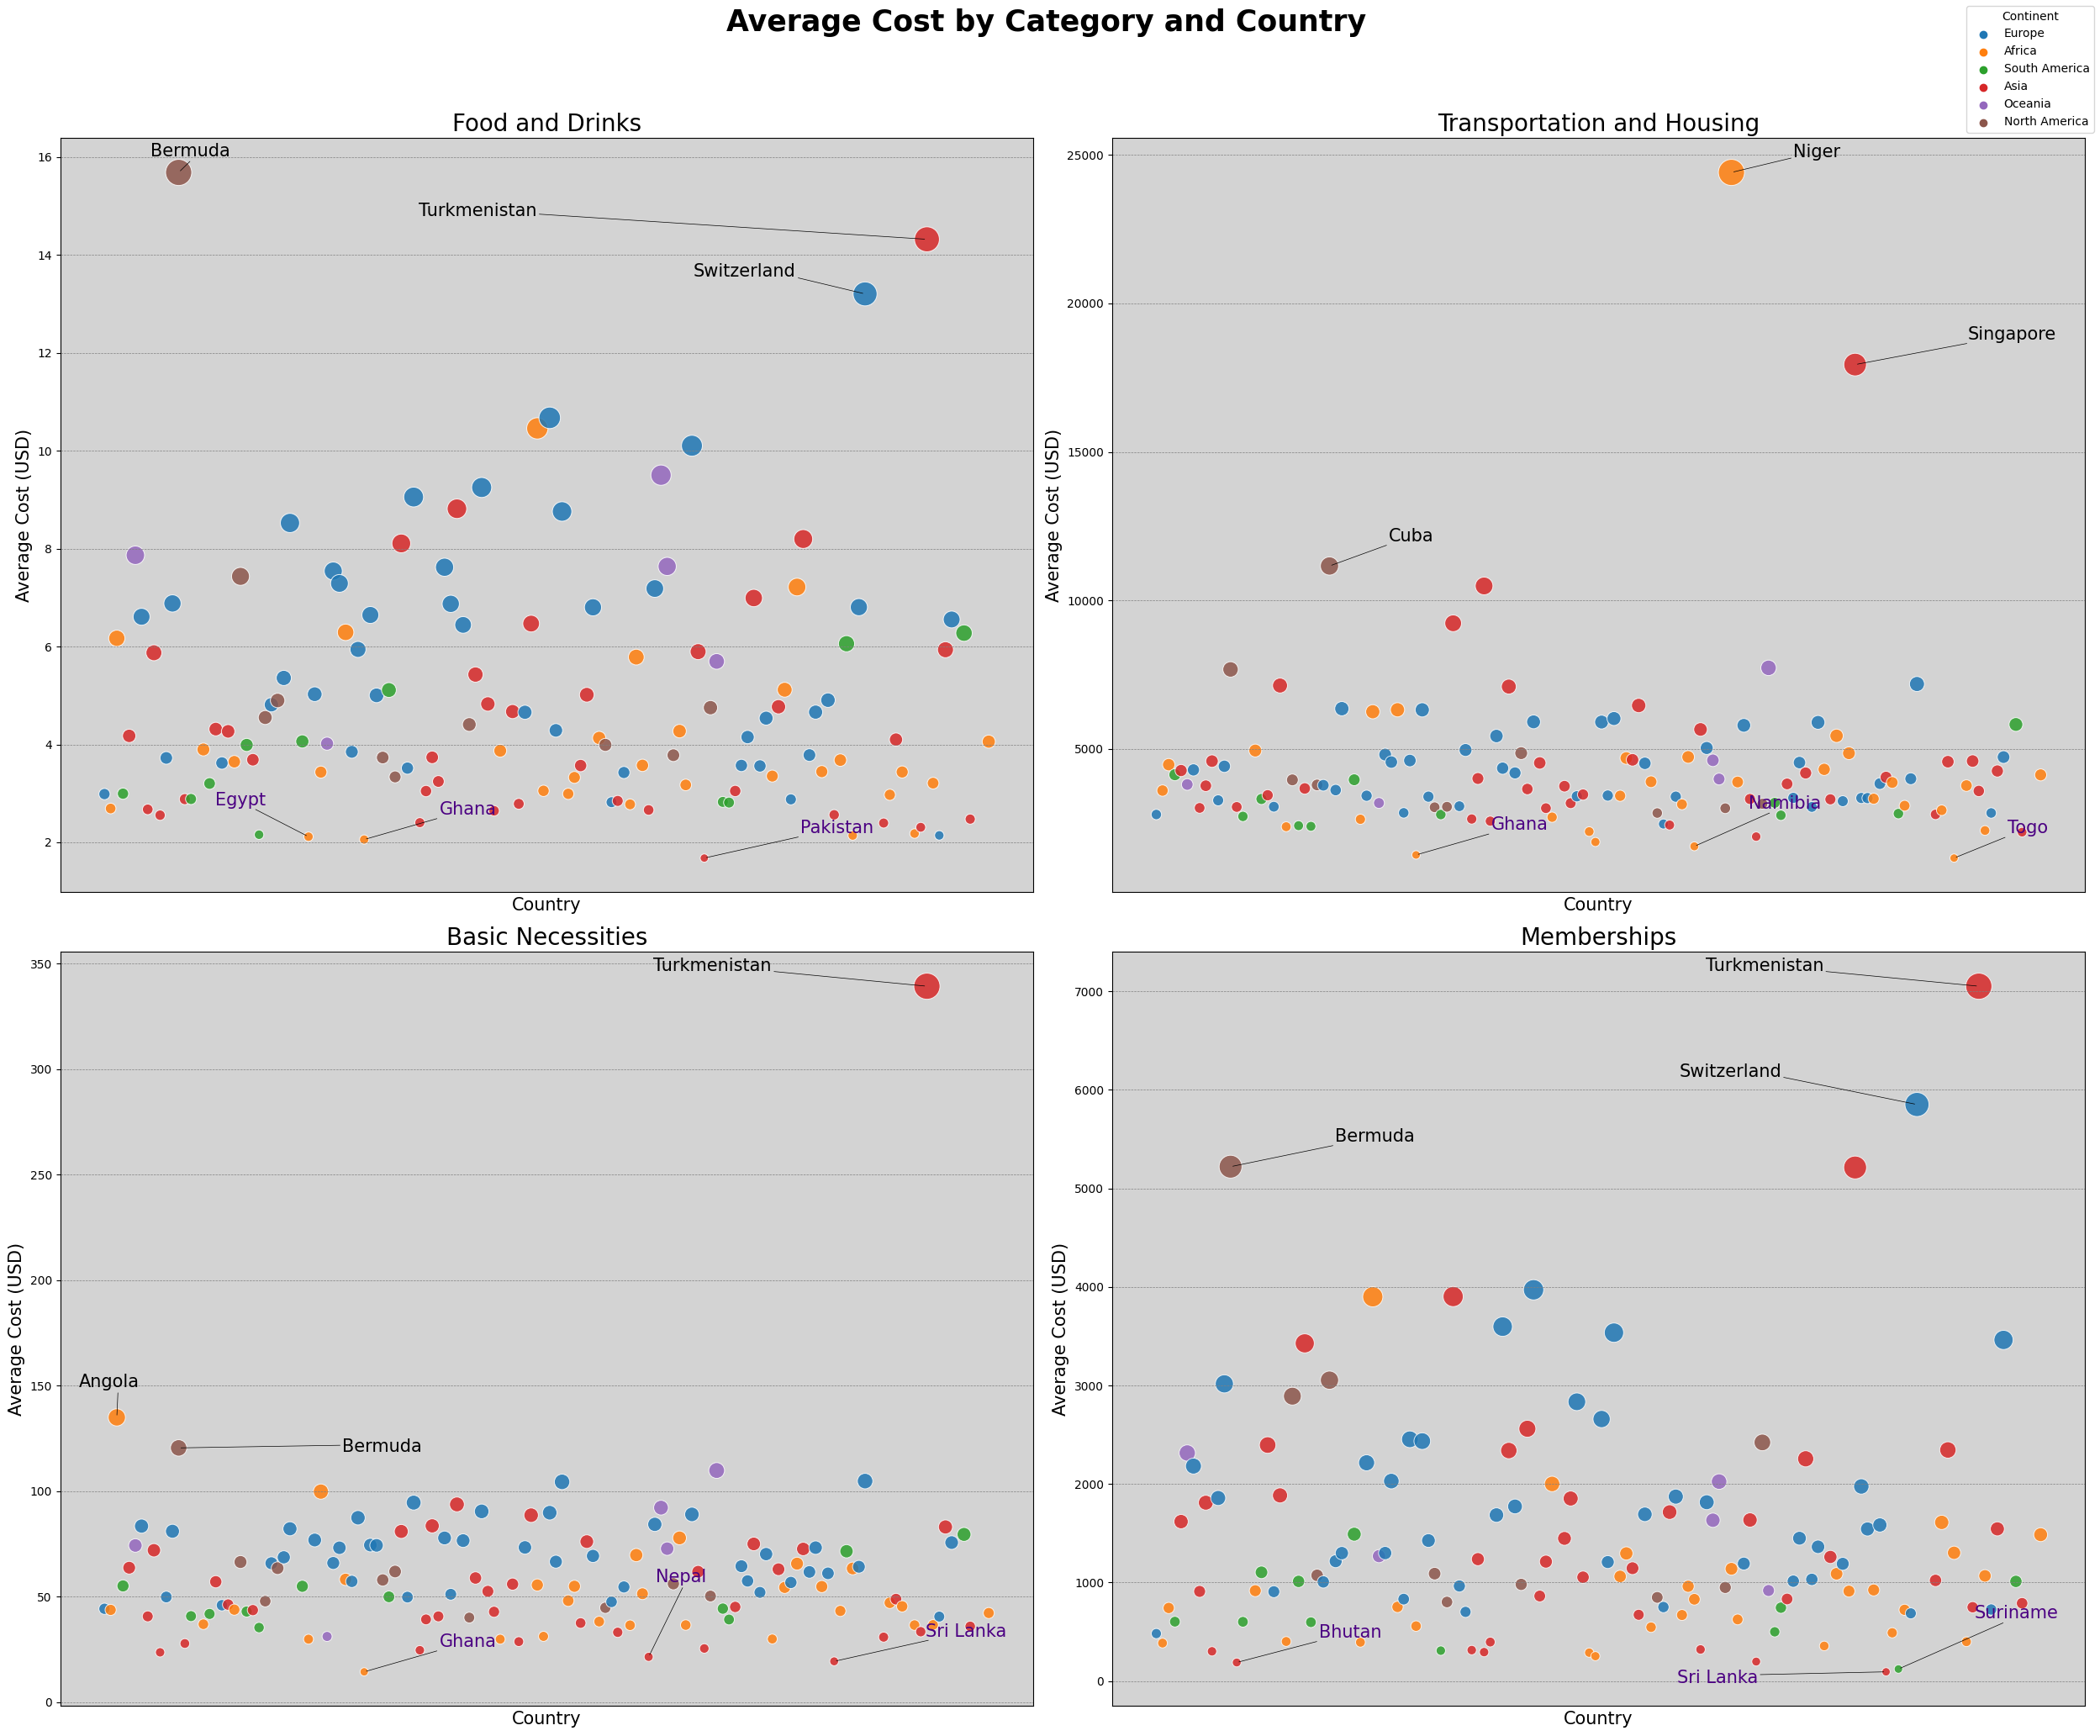

In [74]:
#Setting up plot
fig, axarr = plt.subplots(2, 2, figsize=(25, 20))

#List of categories and axis
categories = ['Food and Drinks', 'Transportation and Housing', 'Basic Necessities', 'Memberships']
axes = [axarr[0, 0], axarr[0, 1], axarr[1, 0], axarr[1, 1]]

#To store text objects for adjustText
texts = []

#Plot subplots
for category, ax in zip(categories, axes):
    sns.scatterplot(data=df_grouped, x='Country', y=category, size=category, hue='Continent',
                    sizes=(50, 500), ax=ax, legend=False, palette='tab10', alpha=0.85)
    ax.set_title(category, fontsize=20)
    ax.set_xlabel('Country', fontsize=15)
    ax.set_ylabel('Average Cost (USD)', fontsize=15)
    #Remove x-axis ticks
    ax.set_xticks([])
    ax.set_facecolor('lightgray')
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

    #Label only top 3 expensive countries with black and least 3 with indigo
    top_3 = df_grouped.nlargest(3, category)
    for i, country in enumerate(top_3['Country']):
        texts.append(ax.text(top_3.index[i], top_3[category].iloc[i], country, fontsize=15, ha='center', va='bottom', color='black'))

    least_3 = df_grouped.nsmallest(3, category)
    for i, country in enumerate(least_3['Country']):
        texts.append(ax.text(least_3.index[i], least_3[category].iloc[i], country, fontsize=15, ha='center', va='bottom', color='indigo'))

    #Adjust texts for this subplot
    adjust_text(texts, ax=ax, force_points=0.2, force_text=0.2, expand_points=(3,3), expand_text=(3,3), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    #Reset texts list for next subplot
    texts = []

#Adding unified continent legend
continent_legend = [ax.scatter([], [], color=plt.get_cmap('tab10')(i), label=continent)
                    for i, continent in enumerate(df_grouped['Continent'].unique())]

#Displaying unified legend for continents only
fig.legend(handles=continent_legend, loc='upper right', title='Continent')

#Overall title
fig.suptitle('Average Cost by Category and Country', fontweight='bold', fontsize=25, y=1.03)

#Adjust layout
plt.tight_layout()
#Save figure to be used in presentation
plt.savefig(PLOT_PATH + "average_cost_by_country_category.png", dpi=300, bbox_inches='tight')
plt.show()

---
There are a total of 16 countries that are either the most or least expensive for a particular catgeory. Another 2x2 scatterplot can be produced, this time looking at the cities for these 16 countries, per category.

This figure is a series of 4 scatterplots and shows the average cost by category and city. The y-axis is the average cost of these items in USD, and the x-axis shows the cities. Each subplot represents a different category: Food and drinks, transportation and housing, basic necessities, and memberships. Each point depicts a specific city, and they are color-coded by countries as seen in the legend. The size of the point indicates the average cost, so the bigger the point, the greater the average cost for that category. The top 3 and least 3 expensive cities are labeled for each of the scatterplots, in black and indigo respectively. As shown, cities in Switzerland and Turkmenistan have a higher average cost, and cities in Pakistan and Ghana have a lesser average cost overall. Ashgabat is a frequent expensive city. Accra and Kumasi are frequent least expensive cities.

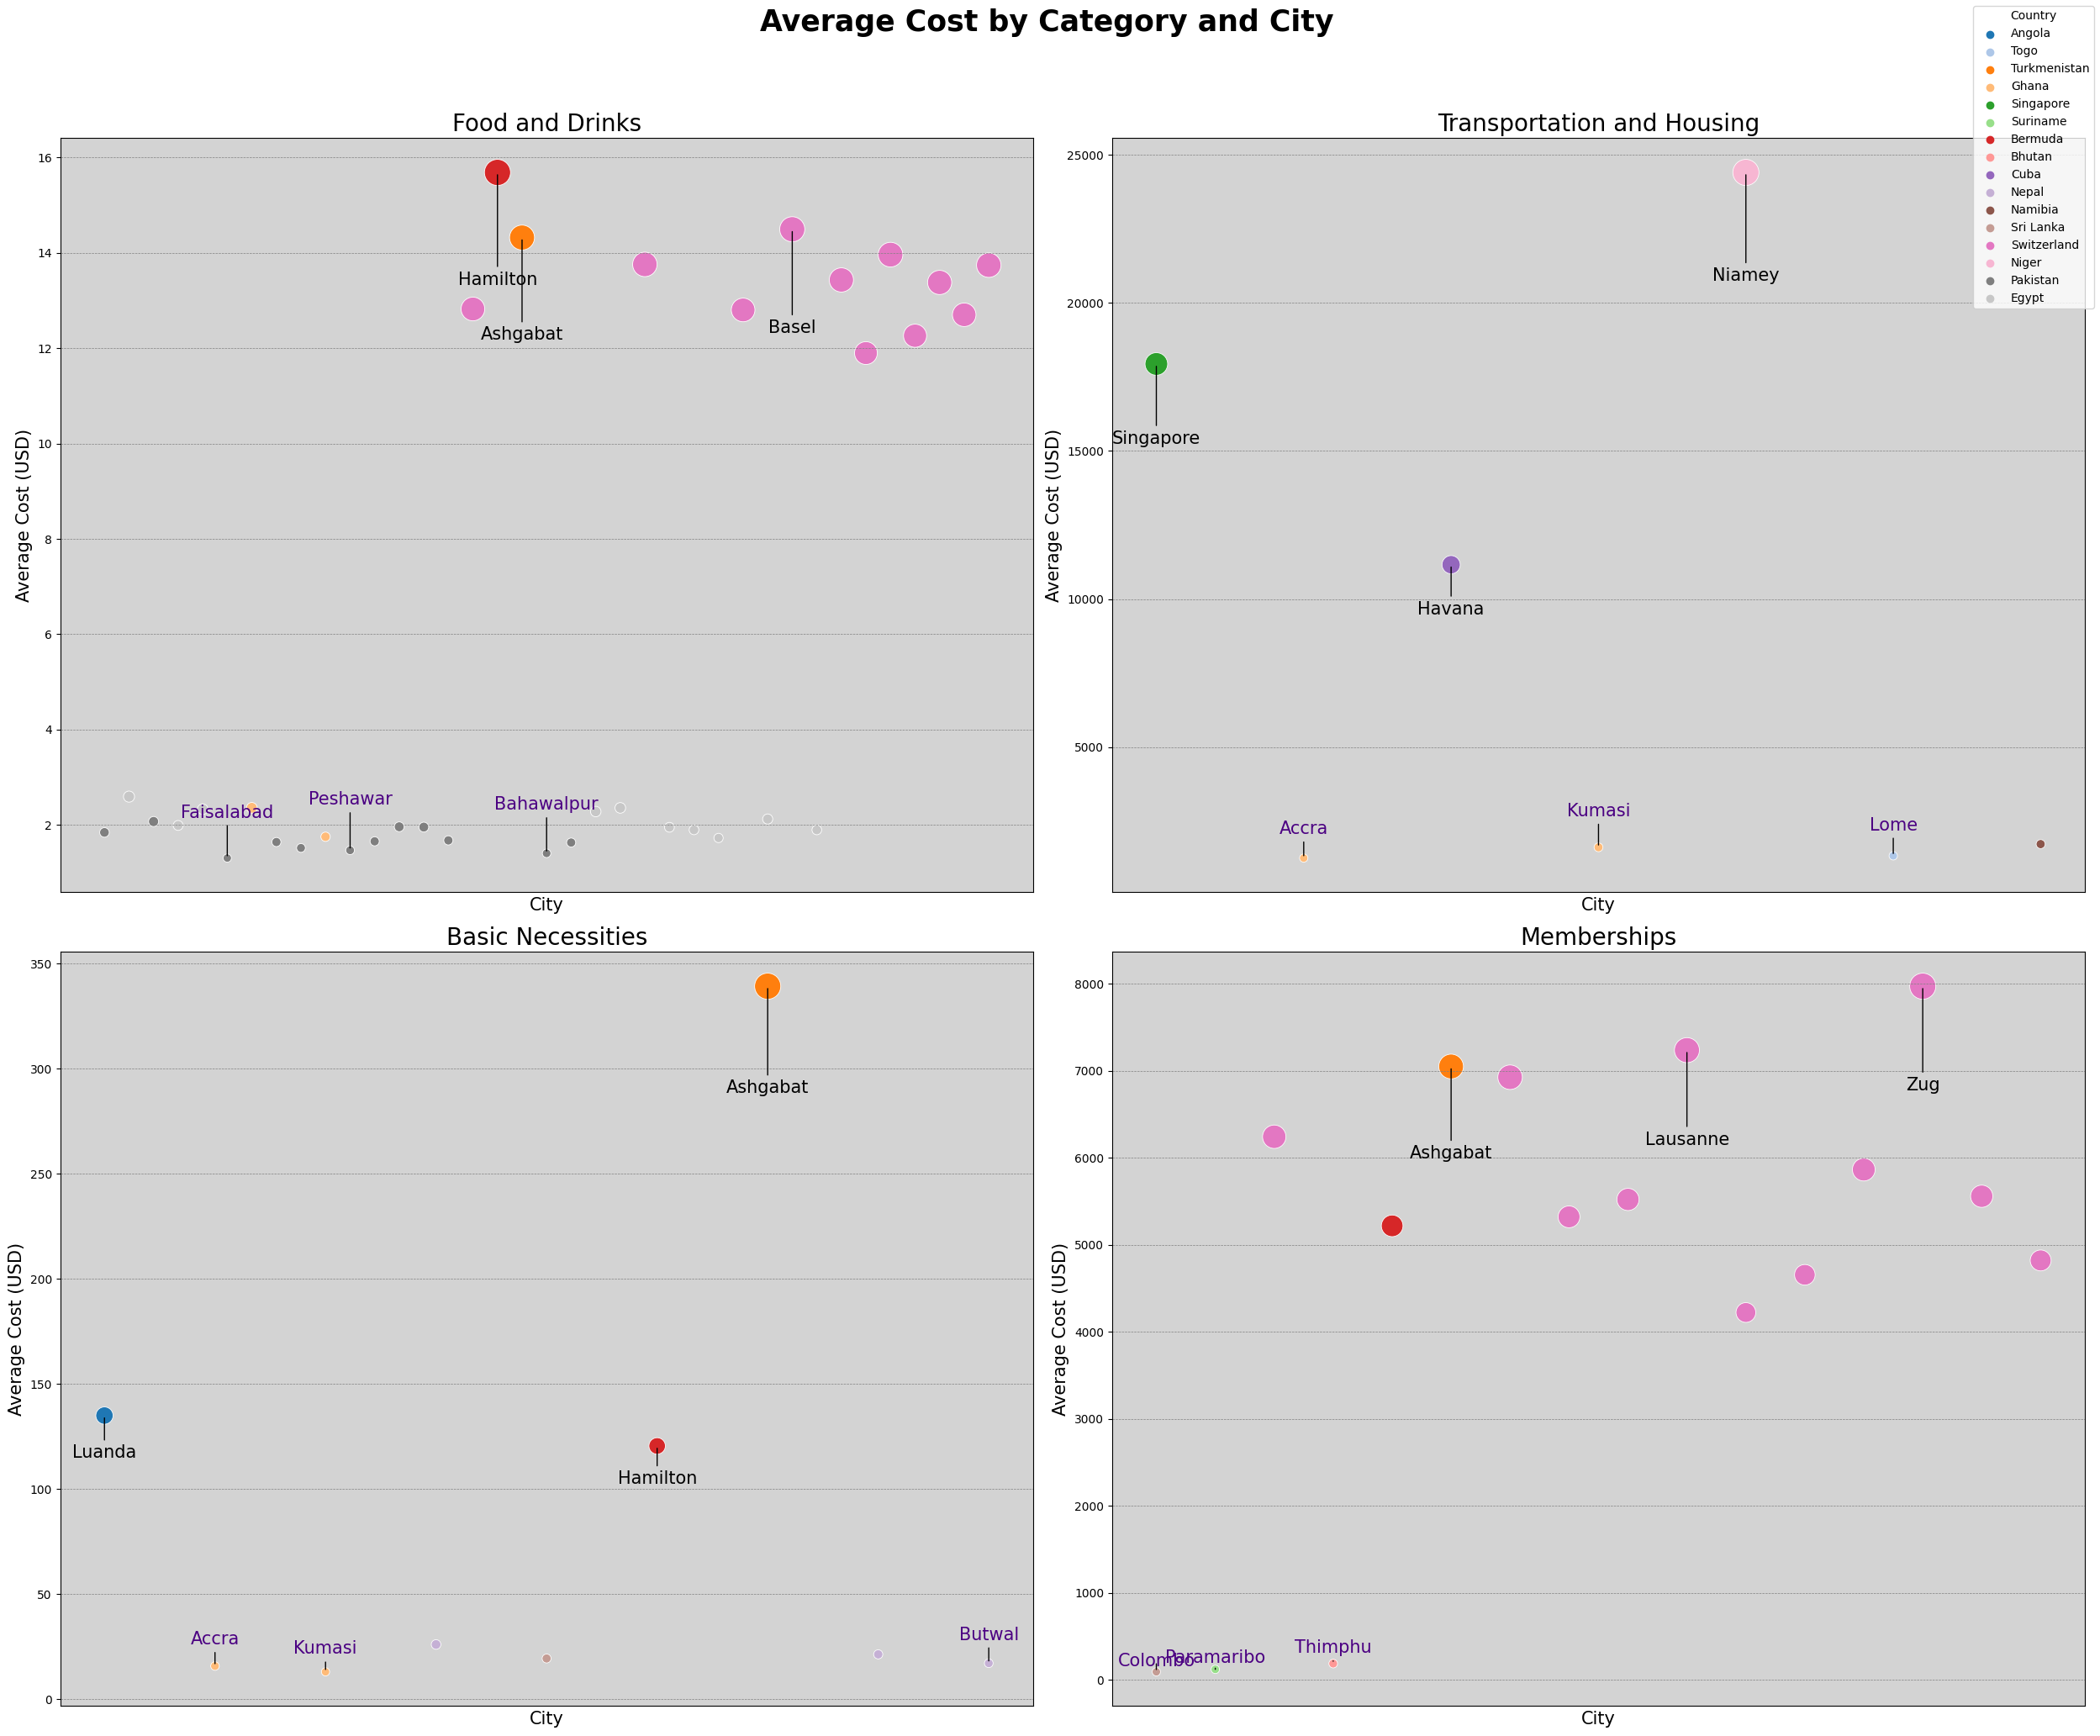

In [75]:
#Identify top 3 and least 3 countries for each category
selected_countries_per_category = {}

for category in categories:
    top_countries = df_grouped.nlargest(3, category)['Country'].tolist()
    least_countries = df_grouped.nsmallest(3, category)['Country'].tolist()
    selected_countries_per_category[category] = top_countries + least_countries

#Create a color palette with 16 distinct colors from 'tab20'
palette = sns.color_palette("tab20", 16)

#Create a dictionary that maps each country to a distinct color
all_selected_countries = list(set().union(*selected_countries_per_category.values()))
color_mapping = {country: color for country, color in zip(all_selected_countries, palette)}

#Create plot
fig, axarr = plt.subplots(2, 2, figsize=(25, 20))
axes = [axarr[0, 0], axarr[0, 1], axarr[1, 0], axarr[1, 1]]

for category, ax in zip(categories, axes):
    #Filter original df_cost_living DataFrame to include only cities from selected countries for this category
    df_selected_cities = df_cost_living[df_cost_living['Country'].isin(selected_countries_per_category[category])]

    #Use color mapping in scatterplot function
    sns.scatterplot(data=df_selected_cities, x='City', y=category, size=category, hue='Country',
                    sizes=(50, 500), ax=ax, legend=False, palette=color_mapping)
    ax.set_title(category, fontsize=20)
    ax.set_xlabel('City', fontsize=15)
    ax.set_ylabel('Average Cost (USD)', fontsize=15)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_facecolor('lightgray')
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

    #Label top 3 expensive cities with arrows, in black
    top_3_cities = df_selected_cities.nlargest(3, category)
    for _, row in top_3_cities.iterrows():
        city, cost = row['City'], row[category]
        ax.annotate(city, xy=(city, cost), xytext=(city, cost-0.15*cost), fontsize=15, color='black',
                    arrowprops=dict(facecolor='red', arrowstyle="-"),
                    ha='center')

    #Label least 3 expensive cities with arrows, in indigo
    least_3_cities = df_selected_cities.nsmallest(3, category)
    for _, row in least_3_cities.iterrows():
        city, cost = row['City'], row[category]
        ax.annotate(city, xy=(city, cost), xytext=(city, cost+0.65*cost), fontsize=15, color='indigo',
                    arrowprops=dict(facecolor='blue', arrowstyle="-"),
                    ha='center')

#Adding unified country legend
country_legend = [ax.scatter([], [], color=color_mapping[country], label=country)
                  for country in all_selected_countries]

fig.legend(handles=country_legend, loc='upper right', title='Country')

#Overall title
fig.suptitle('Average Cost by Category and City', fontweight='bold', fontsize=25, y=1.03)

# Adjust layout
plt.tight_layout()
plt.savefig(PLOT_PATH + "average_cost_by_city_category.png", dpi=300, bbox_inches='tight')
plt.show()

---
Since the x-axis is just ordered by region, a barplot can be produced to convey the same information. It is a better choice of plot to use.

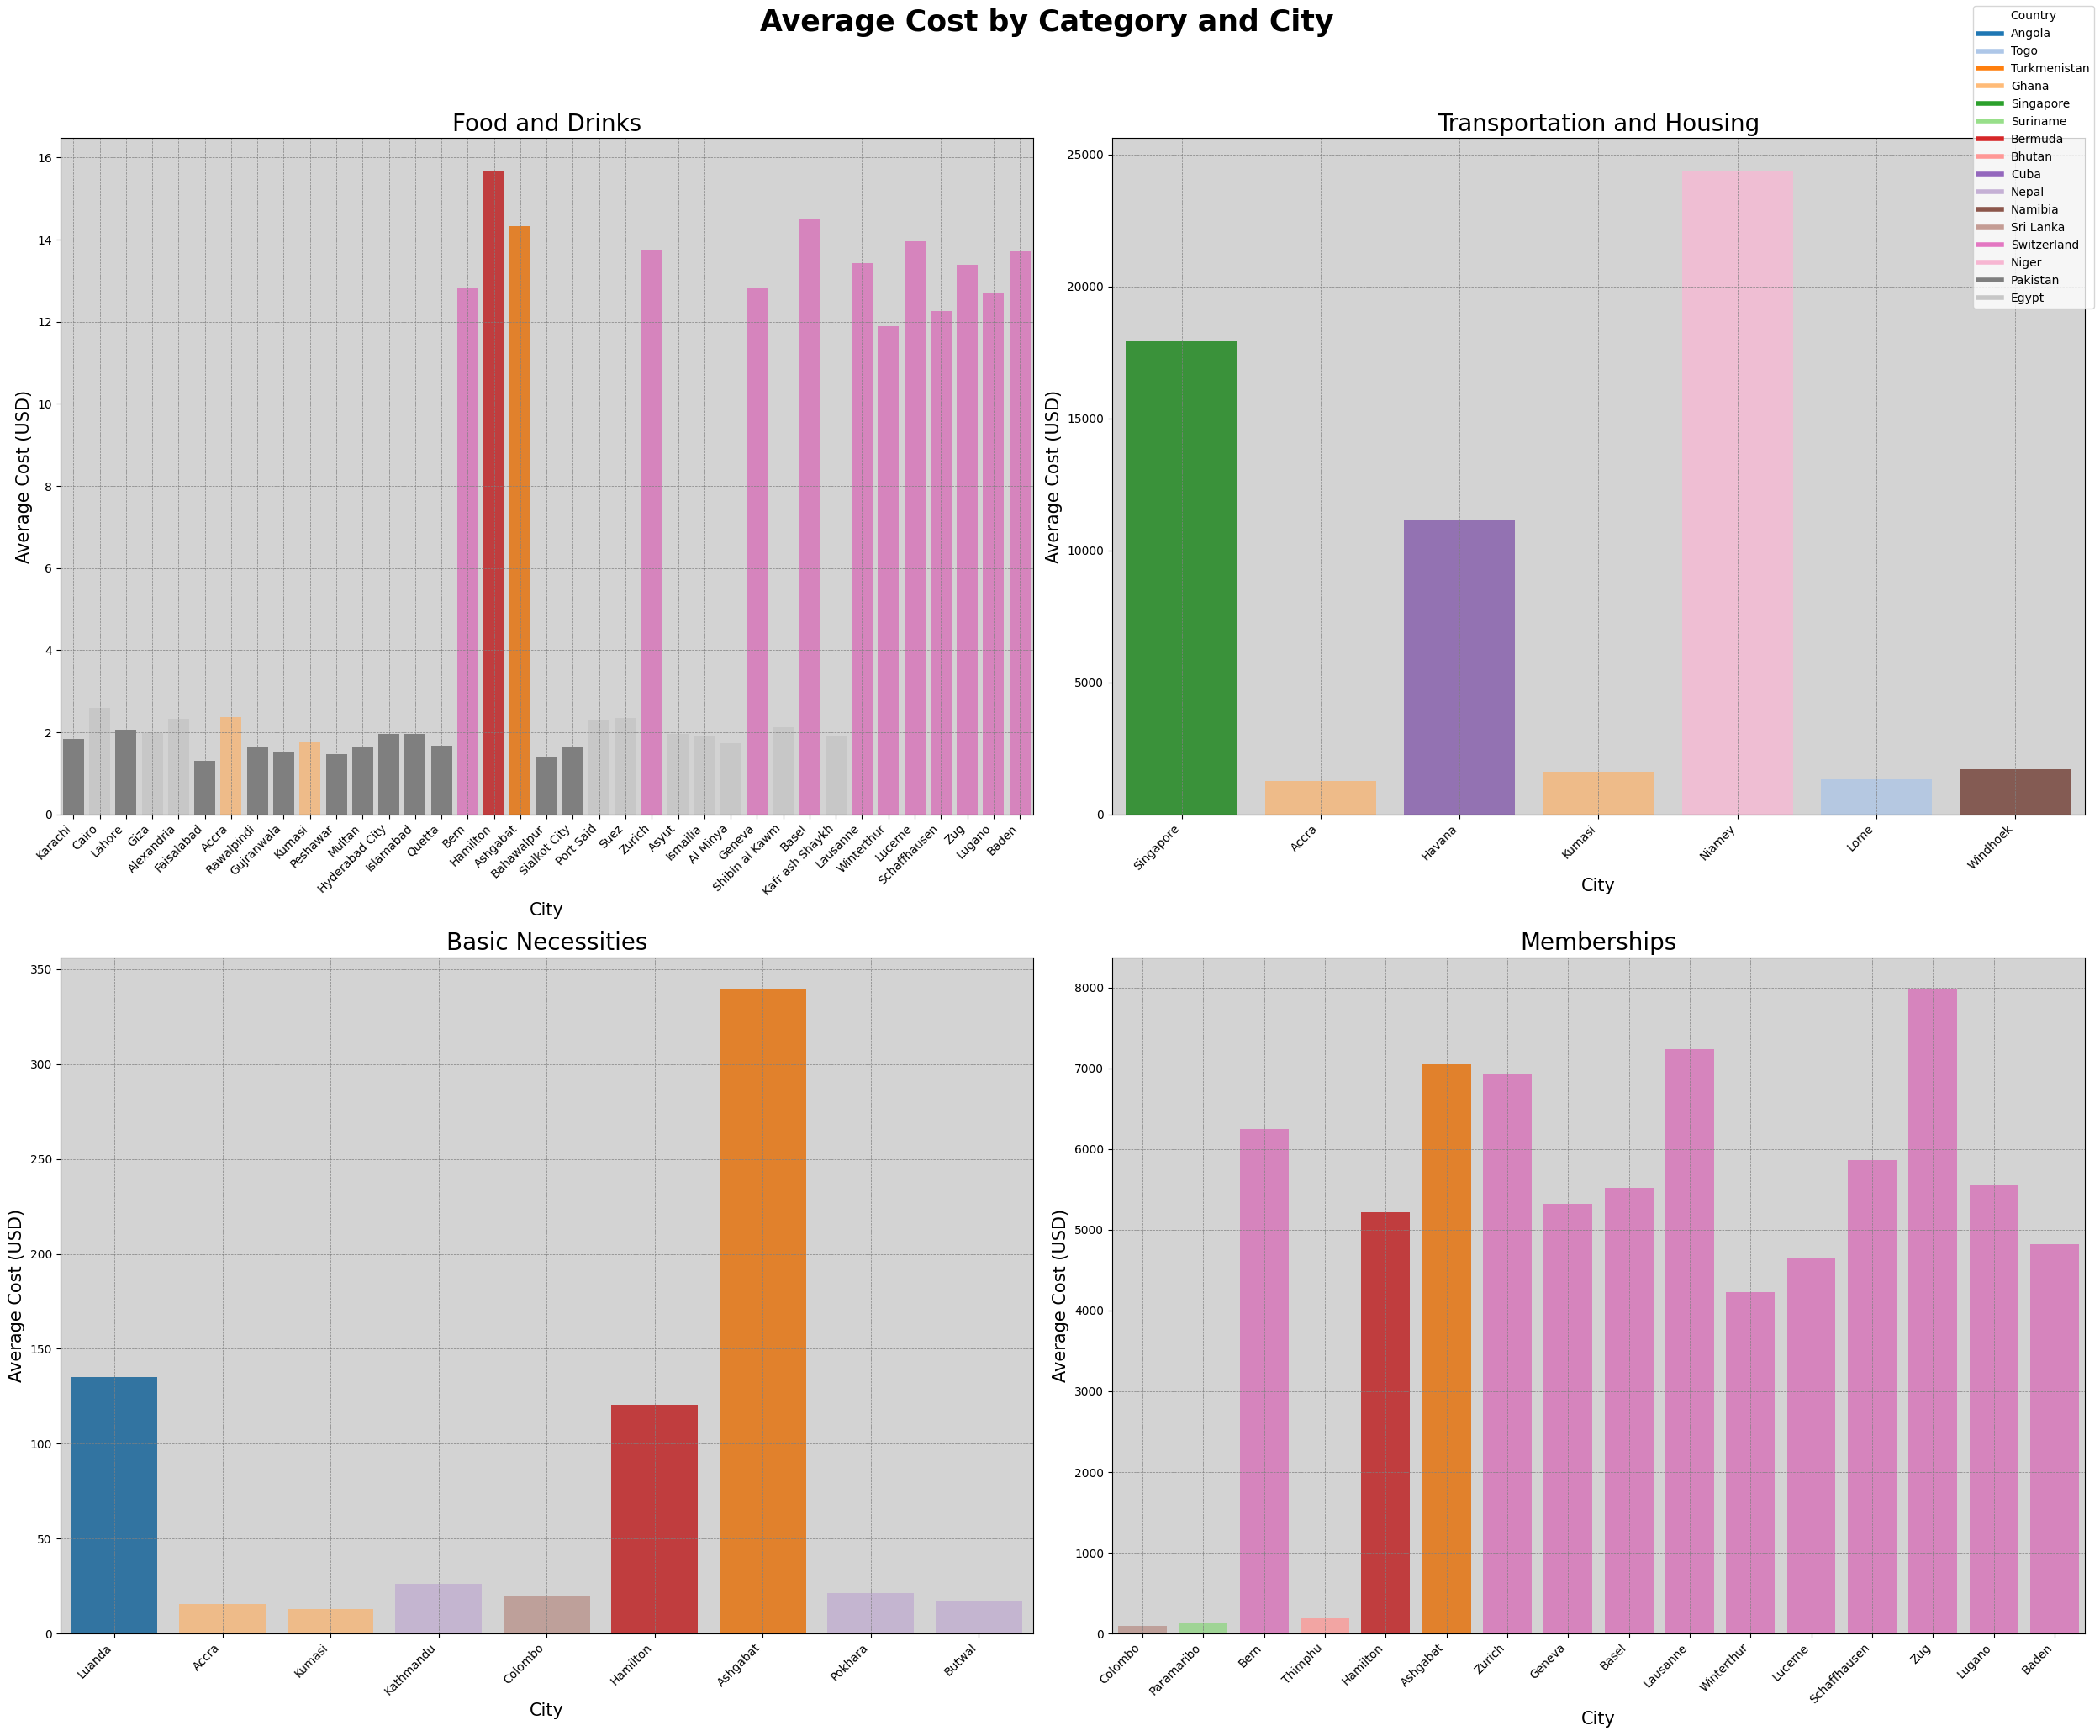

In [76]:
#Identify top 3 and least 3 countries for each category
selected_countries_per_category = {}

for category in categories:
    top_countries = df_grouped.nlargest(3, category)['Country'].tolist()
    least_countries = df_grouped.nsmallest(3, category)['Country'].tolist()
    selected_countries_per_category[category] = top_countries + least_countries

#Create a color palette with 16 distinct colors from 'tab20'
palette = sns.color_palette("tab20", 16)

#Create a dictionary that maps each country to a distinct color
all_selected_countries = list(set().union(*selected_countries_per_category.values()))
color_mapping = {country: color for country, color in zip(all_selected_countries, palette)}

#Create plot
fig, axarr = plt.subplots(2, 2, figsize=(25, 20))
axes = [axarr[0, 0], axarr[0, 1], axarr[1, 0], axarr[1, 1]]

for category, ax in zip(categories, axes):
    # Filter original df_cost_living DataFrame to include only cities from selected countries for this category
    df_selected_cities = df_cost_living[df_cost_living['Country'].isin(selected_countries_per_category[category])]

    # Use sns.barplot
    sns.barplot(data=df_selected_cities, x='City', y=category, hue='Country', ax=ax, palette=color_mapping)

    ax.set_title(category, fontsize=20)
    ax.set_xlabel('City', fontsize=15)
    ax.set_ylabel('Average Cost (USD)', fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_facecolor('lightgray')
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

    # Remove individual legends for each subplot
    ax.get_legend().remove()

# Adding a unified country legend to the figure
legend_elements = [plt.Line2D([0], [0], color=color_mapping[country], lw=4, label=country)
                   for country in all_selected_countries]
fig.legend(handles=legend_elements, loc='upper right', title='Country')

# Overall title
fig.suptitle('Average Cost by Category and City', fontweight='bold', fontsize=25, y=1.03)

# Adjust layout
plt.tight_layout()
plt.savefig(PLOT_PATH + "average_cost_by_city_category_barplot.png", dpi=300, bbox_inches='tight')
plt.show()

---
### **Table**

For the 16 countries identified earlier, a table can be produced that compares prices for basic, daily items for an average bachelor. Here, a bachelor is defined as a single, childless man who lives in the city so he does not need a car, and he has a full time job. Those items that he needs are: Meal, at an inexpensive restaurant, bottle of water, internet, 1-bedroom apartment, and average monthly net salary. So, this is a table that gives insight of how things are priced around the world. Each row is a different country, and each column is the cost for the specified items. Overall, Pakistan has the least average cost and Bermuda has the greatest average cost. Again, we see Asian countries to have the least average cost, and European countries to have the greatest average cost.

---

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>

<h3 class="custom-heading"><b>Contributor(s)</b></h3>
<ul class="custom-spacing">
  <li>Code Reviser(s): Xiaohan Kuang </li>
</ul>

---

<h3 class="custom-heading"><b>Edit Information</b></h3>
<ul class="custom-spacing">
  <li> Fixed TypeError: agg function failed [how->mean,dtype->object]</li>
  <li> Filtered float and int data type and then calculated mean value</li>
</ul>

In [77]:
#Calculate average cost across all categories for each country
numeric_cols = df_cost_living.select_dtypes(include=[float, int])
country_avg_costs = numeric_cols.groupby(df_cost_living['Country']).mean().round(2)

#Reset index for visualization
country_avg_costs_reset = country_avg_costs.reset_index()

#List of selected countries
selected_countries = [
    "Turkmenistan", "Bhutan", "Sri Lanka", "Togo", "Cuba", "Angola",
    "Nepal", "Switzerland", "Egypt", "Singapore", "Niger",
    "Bermuda", "Namibia", "Pakistan", "Suriname", "Ghana"
]

#Filter country_avg_costs_reset dataframe for selected countries
selected_countries_table = country_avg_costs_reset[country_avg_costs_reset['Country'].isin(selected_countries)]

#Select desired columns for table
selected_columns = [
    'Country',
    'Meal, Inexpensive Restaurant (USD)',
    'Water (0.33 liter bottle, in restaurants) (USD)',
    'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)',
    'Apartment (1 bedroom) in City Centre (USD)',
    'Average Monthly Net Salary (After Tax) (USD)'
]
selected_countries_table_filtered = selected_countries_table[selected_columns]

#Compute mean for each numeric row and add it to dataframe
selected_countries_table_filtered['Average Cost (USD)'] = selected_countries_table_filtered.iloc[:, 1:].mean(axis=1).round(2)

#Sort values from least to greatest and reset index
selected_countries_table_filtered.sort_values(by='Average Cost (USD)').reset_index(drop=True)

#Display table for selected countries with desired columns


,Country,"Meal, Inexpensive Restaurant (USD)","Water (0.33 liter bottle, in restaurants) (USD)","Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)",Apartment (1 bedroom) in City Centre (USD),Average Monthly Net Salary (After Tax) (USD),Average Cost (USD)
0,Pakistan,1.35,0.17,20.66,80.49,155.31,51.60
1,Egypt,3.45,0.15,14.49,117.19,162.72,59.60
2,Nepal,2.42,0.17,15.28,111.98,252.11,76.39
3,Sri Lanka,1.36,0.18,9.98,295.69,156.07,92.66
4,Bhutan,3.06,0.16,20.40,152.70,365.25,108.31
5,Cuba,10.00,1.63,165.00,353.33,35.75,113.14
6,Suriname,4.86,0.74,37.50,394.71,234.55,134.47
7,Ghana,2.05,0.12,32.94,348.34,307.64,138.22
8,Niger,3.96,0.85,11.88,533.06,208.49,151.65
9,Togo,1.98,1.27,58.48,255.34,527.83,168.98


In [78]:
#Save table to Excel file
file_path = CLEANED_PATH + "selected_countries_table.xlsx"
selected_countries_table_filtered.to_excel(file_path, index=False)

---
### **Conclusion**

Here are some takeaways:

* European countries have stronger average costs based on the data

* African and Asian countries have weaker average costs based on the data

* There are several cities in Switzerland that have a high average cost for 'Food and Drinks' and 'Memberships'

* Further research needs to be done

  * Look at economic indicators and see what impact it has

  * Other factors such as the strength of the country's currency against the U.S dollar

  * What cities and countries culturally value more

After concluding the exploratory data analysis, we see cities and countries in Europe indeed has the greatest cost of living, whereas cities and countries in Asia has the least cost of living. Thus, it is reasonable to say Europe is the continent that has a higher global cost of living and Asia the least. We can filter by these 2 continents, as well as North America since we reside here, to then do further analysis and see which economic indicator has the greatest impact on the unemployment, and is that telling to the trends for the global cost of living?

---
### **CPI Data Preprocessing**

#### Data Details
This dataset was downloaded from the World Bank (Link: https://databank.worldbank.org/home).

In [79]:
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: c:\Users\alan_\Desktop\DS-5610-Exploratory_Data_Analysis\final_project\final-project-group_10


In [80]:
xls_path1 = RAW_PATH + 'API_FP.CPI.TOTL.ZG_DS2_en_excel_v2_5994828.xls'
df1 = pd.read_excel(xls_path1, 'Data', skiprows = 3)
df2 = pd.read_excel(xls_path1, 'Metadata - Countries')

Next, we can merge the 2 dataframe based on the country code and filter the data from 2000 to 2022. Then, we reorder the columns based on a few variables as detailed below.

In [81]:
def pre_cleaning(df1, df2):
    # Merging the two dataframes based on 'Country Code' ensuring the information matches correctly
    merged_df = pd.merge(df1, df2[['Country Code', 'IncomeGroup', 'Region']], on='Country Code', how='left')

    # Drop column from 1960 to 1999
    cols_to_drop = [str(year) for year in range(1960, 2000)]
    merged_df = merged_df.drop(columns=cols_to_drop, errors='ignore')

    # Reordering the columns to place 'IncomeGroup' and 'Region' after 'Country Code'
    cols = merged_df.columns.tolist()
    incomegroup_index = cols.index('IncomeGroup')
    region_index = cols.index('Region')
    new_order = cols[:3] + [cols[incomegroup_index]] + [cols[region_index]] + cols[3:incomegroup_index] + cols[incomegroup_index+1:region_index] + cols[region_index+1:]
    merged_df = merged_df[new_order]

    # Reorder data based on 'Region'
    merged_df = merged_df.sort_values(by='Region', na_position='last')

    return merged_df

In [82]:
df_cpi = pre_cleaning(df1, df2)

We can then convert the country codes and apply it to the dataframe.

In [83]:
def get_continent_name_from_alpha3(alpha_3_code):
    try:
        alpha_2_code = pc.country_alpha3_to_country_alpha2(alpha_3_code)
        continent_code = pc.country_alpha2_to_continent_code(alpha_2_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

# Apply
df_cpi['Continent'] = df_cpi['Country Code'].apply(get_continent_name_from_alpha3)
country_code_col_index = df_cpi.columns.get_loc('Country Code')
df_cpi.insert(country_code_col_index + 1, 'Continent', df_cpi.pop('Continent'))

In [84]:
# 'Region' non-empty but 'Continent' empty
filtered_df = df_cpi[(df_cpi['Region'].notna()) & (df_cpi['Continent'].isna())]

# Show filtered Country Name
print(filtered_df['Country Name'])

237                  Timor-Leste
261                       Kosovo
38               Channel Islands
225    Sint Maarten (Dutch part)
Name: Country Name, dtype: object


In [85]:
# Use a little hard code to fill in map which Country Code cannot be identified
continent_mapping = {
    "Timor-Leste": "Asia",
    "Kosovo": "Europe",
    "Channel Islands": "Europe",
    "Sint Maarten (Dutch part)": "North America",
}

def map_continent(row):
    name = row['Country Name']
    return continent_mapping.get(name, None)

df_cpi['Continent'] = df_cpi.apply(lambda row: map_continent(row) if pd.isna(row['Continent']) else row['Continent'], axis = 1)

In [86]:
df_cpi.to_excel(CLEANED_PATH + 'CPI_cleaned.xlsx')